<a href="https://colab.research.google.com/github/mkash96/portweb/blob/main/RLA1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#                                              PART 1

Greedy with Non-optimistic Initial Values

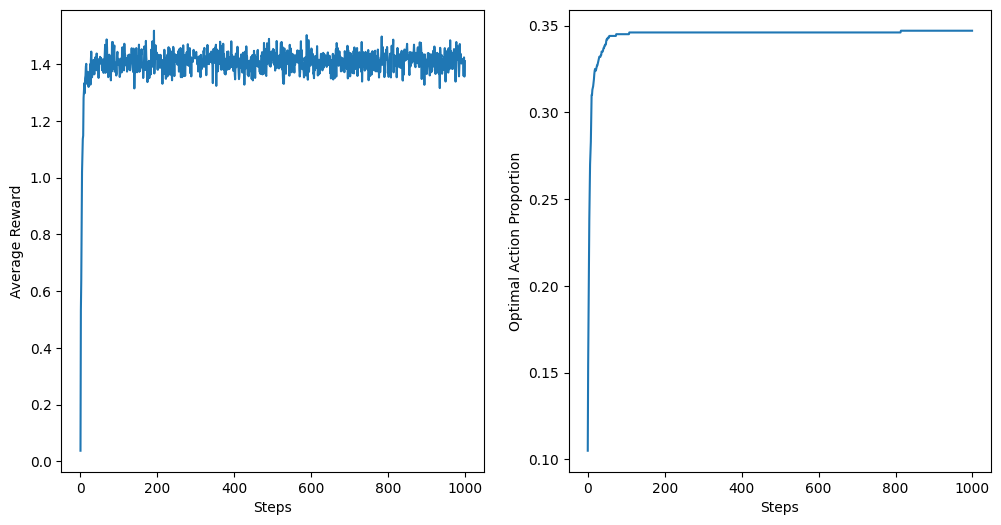

In [14]:
import numpy as np
import matplotlib.pyplot as plt

# Define a class for the k-armed bandit problem
class Bandit:
    def __init__(self, k=10):
        # Initialize the number of arms
        self.k = k
        # Initialize the true mean rewards for each arm from a normal distribution
        self.means = np.random.normal(0, 1, self.k)
        # Generate the actual reward distributions for each arm
        self.q_true = np.random.normal(self.means, 1, self.k)
        # Initialize the estimated rewards for each arm to zero
        self.q_estimates = np.zeros(self.k)
        # Initialize the counts of times each arm has been chosen to zero
        self.action_counts = np.zeros(self.k)
        # Initialize the total reward accumulated
        self.total_reward = 0

    # Select the action with the highest estimated reward (greedy approach)
    def select_action(self):
        return np.argmax(self.q_estimates)

    # Get the reward from the chosen action based on the true reward distribution
    def get_reward(self, action):
        return np.random.normal(self.q_true[action], 1)

    # Update the estimated reward for the chosen action using an incremental formula
    def update_estimates(self, action, reward):
        self.action_counts[action] += 1
        self.q_estimates[action] += (reward - self.q_estimates[action]) / self.action_counts[action]

    # Run the bandit algorithm for a specified number of steps
    def run(self, steps=1000):
        rewards = np.zeros(steps)
        optimal_action_counts = np.zeros(steps)
        for step in range(steps):
            # Select the action
            action = self.select_action()
            # Get the reward for the selected action
            reward = self.get_reward(action)
            # Update the estimated reward for the selected action
            self.update_estimates(action, reward)
            # Store the reward for this step
            rewards[step] = reward
            # Check if the selected action was optimal
            if action == np.argmax(self.q_true):
                optimal_action_counts[step] = 1
        return rewards, optimal_action_counts

# Function to simulate the bandit algorithm over multiple runs
def simulate_bandits(runs=1000, steps=1000):
    avg_rewards = np.zeros(steps)
    optimal_action_proportions = np.zeros(steps)
    for _ in range(runs):
        bandit = Bandit()
        rewards, optimal_actions = bandit.run(steps)
        avg_rewards += rewards
        optimal_action_proportions += optimal_actions
    avg_rewards /= runs
    optimal_action_proportions /= runs
    return avg_rewards, optimal_action_proportions

# Main block to execute the simulation and plot the results
if __name__ == "__main__":
    avg_rewards, optimal_action_proportions = simulate_bandits()
    plt.figure(figsize=(12, 6))
    # Plot the average reward over time
    plt.subplot(1, 2, 1)
    plt.plot(avg_rewards)
    plt.xlabel('Steps')
    plt.ylabel('Average Reward')
    # Plot the proportion of times the optimal action was chosen over time
    plt.subplot(1, 2, 2)
    plt.plot(optimal_action_proportions)
    plt.xlabel('Steps')
    plt.ylabel('Optimal Action Proportion')
    plt.show()


Epsilon-Greedy with different choices of Epsilon

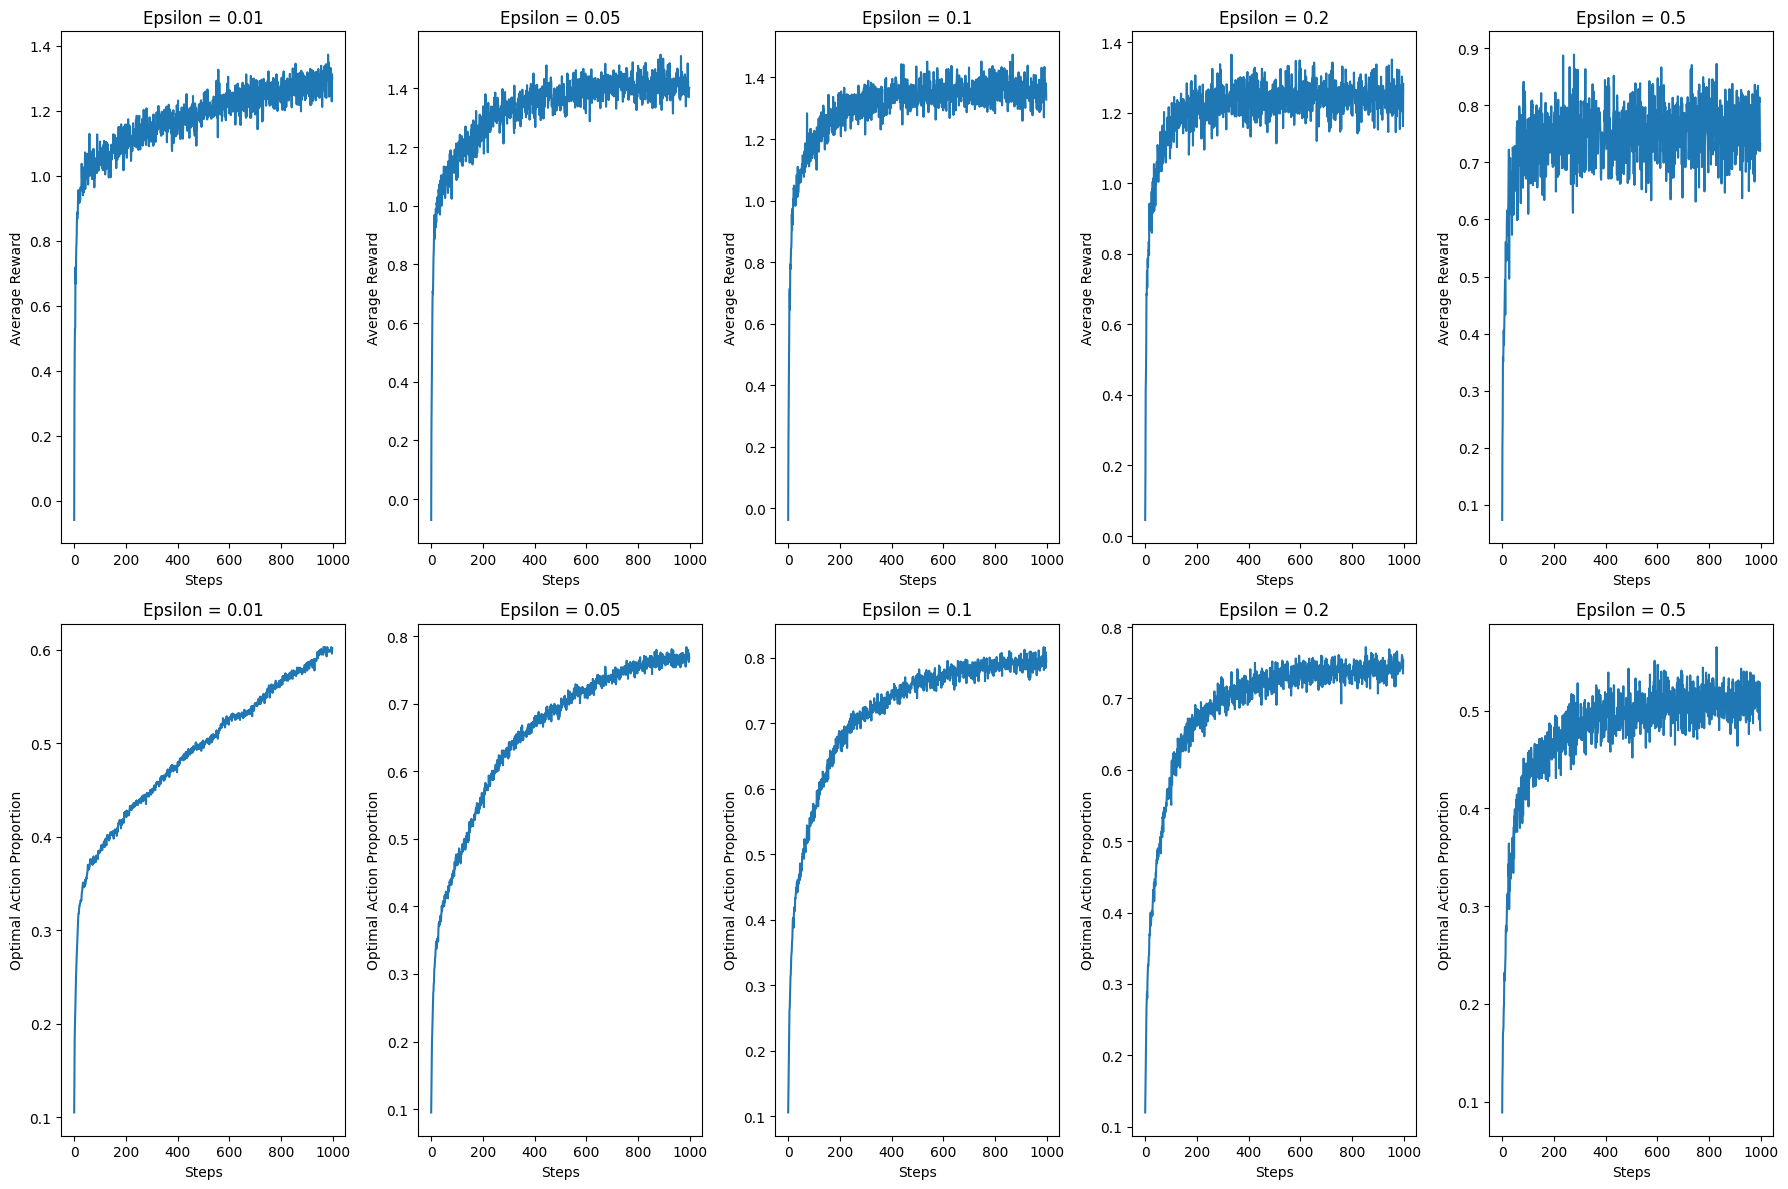

Best epsilon value: 0.05


In [15]:
# Define a class for the epsilon-greedy bandit algorithm
class EpsilonGreedyBandit:
    def __init__(self, k=10, epsilon=0.1):
        # Initialize the number of arms
        self.k = k
        # Initialize the epsilon value for exploration
        self.epsilon = epsilon
        # Initialize the true mean rewards for each arm from a normal distribution
        self.q_true = np.random.normal(0, 1, self.k)
        # Initialize the estimated rewards for each arm to zero
        self.q_estimates = np.zeros(self.k)
        # Initialize the counts of times each arm has been chosen to zero
        self.action_counts = np.zeros(self.k)
        # Initialize the total reward accumulated
        self.total_reward = 0

    # Select an action using the epsilon-greedy strategy
    def select_action(self):
        if np.random.rand() < self.epsilon:
            # Explore: choose a random action
            return np.random.choice(self.k)
        else:
            # Exploit: choose the action with the highest estimated reward
            return np.argmax(self.q_estimates)

    # Get the reward from the chosen action based on the true reward distribution
    def get_reward(self, action):
        return np.random.normal(self.q_true[action], 1)

    # Update the estimated reward for the chosen action using an incremental formula
    def update_estimates(self, action, reward):
        self.action_counts[action] += 1
        self.q_estimates[action] += (reward - self.q_estimates[action]) / self.action_counts[action]

    # Run the bandit algorithm for a specified number of steps
    def run(self, steps=1000):
        rewards = np.zeros(steps)
        optimal_action_counts = np.zeros(steps)
        for step in range(steps):
            # Select the action
            action = self.select_action()
            # Get the reward for the selected action
            reward = self.get_reward(action)
            # Update the estimated reward for the selected action
            self.update_estimates(action, reward)
            # Store the reward for this step
            rewards[step] = reward
            # Check if the selected action was optimal
            if action == np.argmax(self.q_true):
                optimal_action_counts[step] = 1
        return rewards, optimal_action_counts

# Function to simulate the epsilon-greedy bandit algorithm over multiple runs
def simulate_epsilon_greedy_bandits(epsilon, runs=1000, steps=1000):
    avg_rewards = np.zeros(steps)
    optimal_action_proportions = np.zeros(steps)
    for _ in range(runs):
        bandit = EpsilonGreedyBandit(epsilon=epsilon)
        rewards, optimal_actions = bandit.run(steps)
        avg_rewards += rewards
        optimal_action_proportions += optimal_actions
    avg_rewards /= runs
    optimal_action_proportions /= runs
    return avg_rewards, optimal_action_proportions

# Main block to execute the simulation and plot the results for different epsilon values
if __name__ == "__main__":
    epsilons = [0.01, 0.05, 0.1, 0.2, 0.5]
    results = {}
    plt.figure(figsize=(18, 12))

    for i, epsilon in enumerate(epsilons):
        # Simulate the epsilon-greedy bandit algorithm for the current epsilon value
        avg_rewards, optimal_action_proportions = simulate_epsilon_greedy_bandits(epsilon)
        results[epsilon] = (avg_rewards, optimal_action_proportions)
        # Plot the average reward over time for the current epsilon value
        plt.subplot(2, len(epsilons), i + 1)
        plt.plot(avg_rewards)
        plt.xlabel('Steps')
        plt.ylabel('Average Reward')
        plt.title(f'Epsilon = {epsilon}')

        # Plot the proportion of times the optimal action was chosen over time for the current epsilon value
        plt.subplot(2, len(epsilons), i + 1 + len(epsilons))
        plt.plot(optimal_action_proportions)
        plt.xlabel('Steps')
        plt.ylabel('Optimal Action Proportion')
        plt.title(f'Epsilon = {epsilon}')

    plt.tight_layout()
    plt.show()

    # Analyze results to find the best epsilon value
    best_epsilon = None
    best_avg_reward = -np.inf
    for epsilon, (avg_rewards, optimal_action_proportions) in results.items():
        final_avg_reward = avg_rewards[-1]
        if final_avg_reward > best_avg_reward:
            best_avg_reward = final_avg_reward
            best_epsilon = epsilon

    print(f"Best epsilon value: {best_epsilon}")


Optimistic starting values with a Greedy Approach

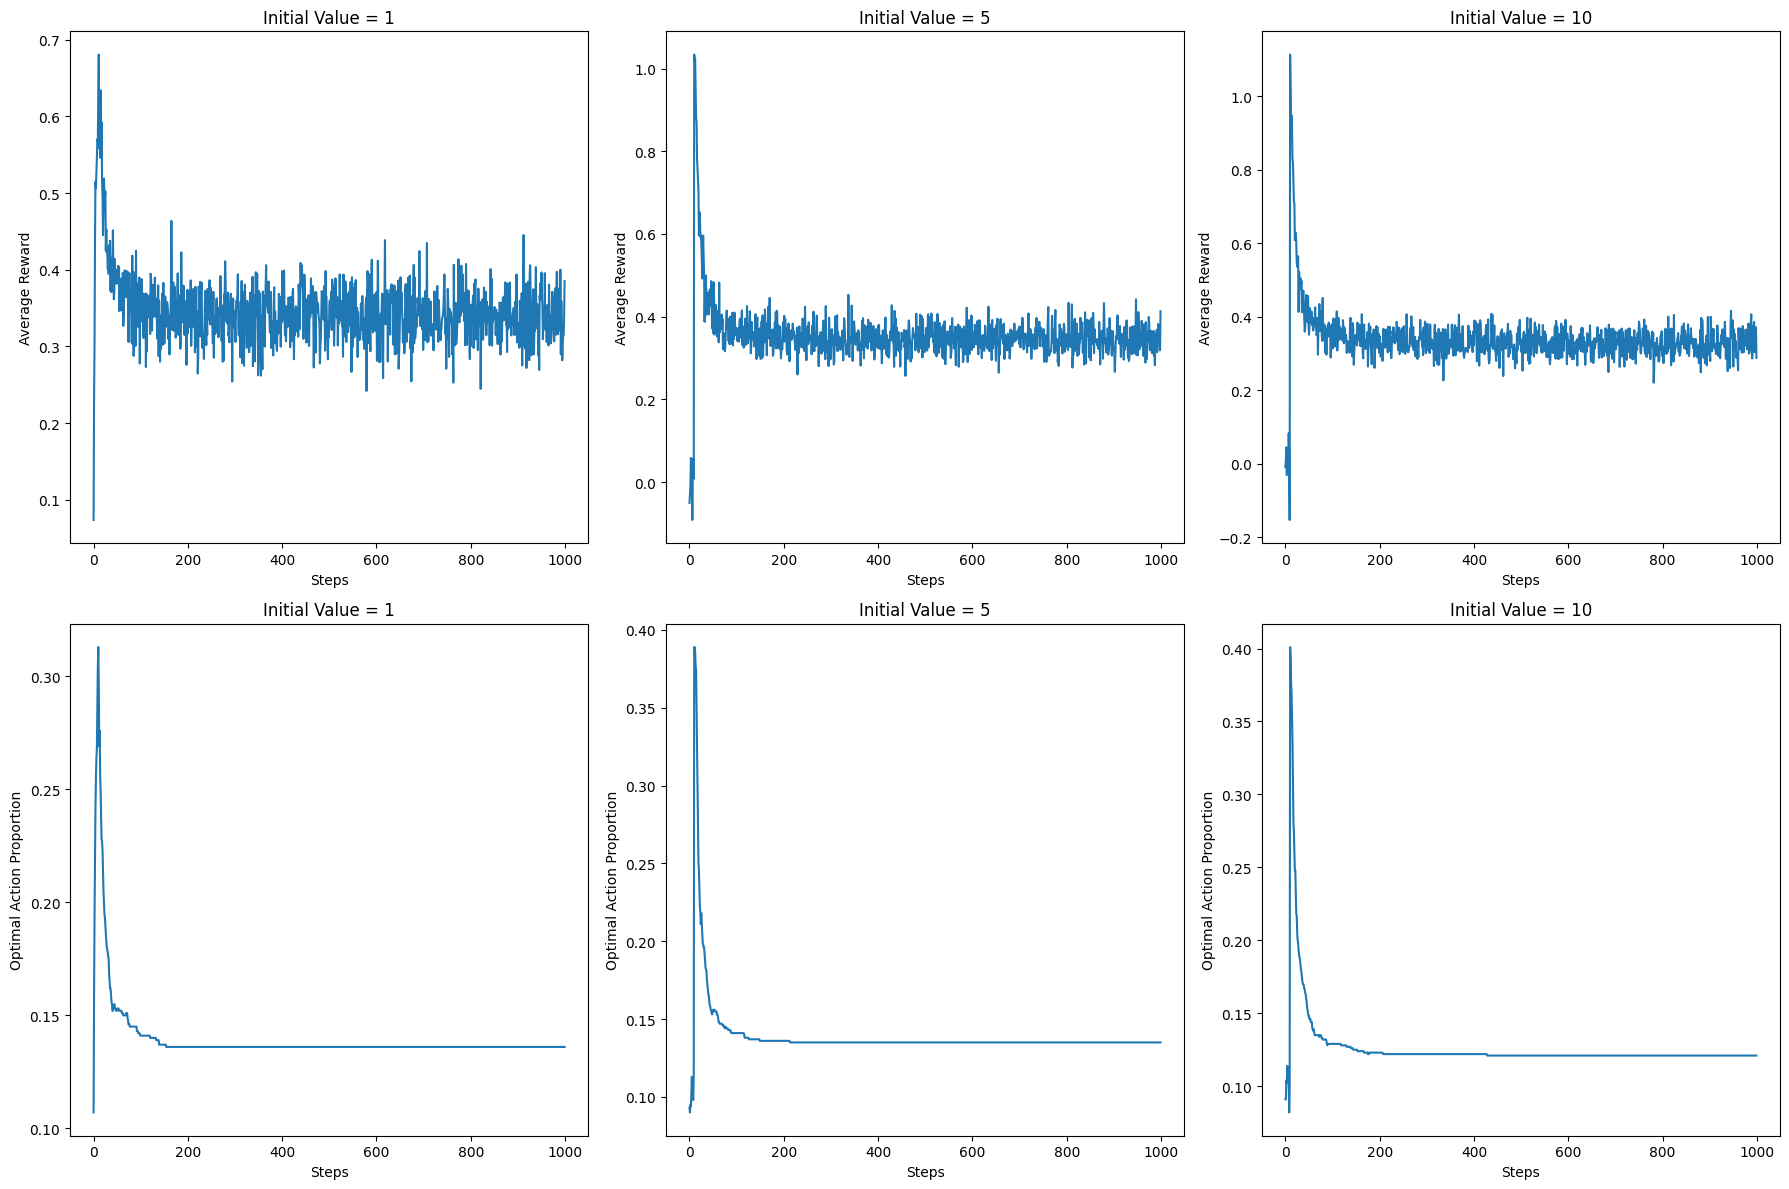

Best initial value: 5


In [16]:
# Define a class for the optimistic greedy bandit algorithm
class OptimisticGreedyBandit:
    def __init__(self, k=10, initial_value=5):
        # Initialize the number of arms
        self.k = k
        # Initialize the true mean rewards for each arm from a normal distribution
        self.q_true = np.random.normal(0, 1, self.k)
        # Initialize the estimated rewards for each arm with an optimistic initial value
        self.q_estimates = np.full(self.k, initial_value)
        # Initialize the counts of times each arm has been chosen to zero
        self.action_counts = np.zeros(self.k)
        # Initialize the total reward accumulated
        self.total_reward = 0

    # Select the action with the highest estimated reward (greedy approach)
    def select_action(self):
        return np.argmax(self.q_estimates)

    # Get the reward from the chosen action based on the true reward distribution
    def get_reward(self, action):
        return np.random.normal(self.q_true[action], 1)

    # Update the estimated reward for the chosen action using an incremental formula
    def update_estimates(self, action, reward):
        self.action_counts[action] += 1
        self.q_estimates[action] += (reward - self.q_estimates[action]) / self.action_counts[action]

    # Run the bandit algorithm for a specified number of steps
    def run(self, steps=1000):
        rewards = np.zeros(steps)
        optimal_action_counts = np.zeros(steps)
        for step in range(steps):
            # Select the action
            action = self.select_action()
            # Get the reward for the selected action
            reward = self.get_reward(action)
            # Update the estimated reward for the selected action
            self.update_estimates(action, reward)
            # Store the reward for this step
            rewards[step] = reward
            # Check if the selected action was optimal
            if action == np.argmax(self.q_true):
                optimal_action_counts[step] = 1
        return rewards, optimal_action_counts

# Function to simulate the optimistic greedy bandit algorithm over multiple runs
def simulate_optimistic_greedy_bandits(initial_value, runs=1000, steps=1000):
    avg_rewards = np.zeros(steps)
    optimal_action_proportions = np.zeros(steps)
    for _ in range(runs):
        bandit = OptimisticGreedyBandit(initial_value=initial_value)
        rewards, optimal_actions = bandit.run(steps)
        avg_rewards += rewards
        optimal_action_proportions += optimal_actions
    avg_rewards /= runs
    optimal_action_proportions /= runs
    return avg_rewards, optimal_action_proportions

# Main block to execute the simulation and plot the results for different initial values
if __name__ == "__main__":
    initial_values = [1, 5, 10]
    results = {}  # Initialize results dictionary here
    plt.figure(figsize=(18, 12))

    for i, initial_value in enumerate(initial_values):
        # Simulate the optimistic greedy bandit algorithm for the current initial value
        avg_rewards, optimal_action_proportions = simulate_optimistic_greedy_bandits(initial_value)
        results[initial_value] = (avg_rewards, optimal_action_proportions)  # Store results for each initial value
        # Plot the average reward over time for the current initial value
        plt.subplot(2, len(initial_values), i + 1)
        plt.plot(avg_rewards)
        plt.xlabel('Steps')
        plt.ylabel('Average Reward')
        plt.title(f'Initial Value = {initial_value}')

        # Plot the proportion of times the optimal action was chosen over time for the current initial value
        plt.subplot(2, len(initial_values), i + 1 + len(initial_values))
        plt.plot(optimal_action_proportions)
        plt.xlabel('Steps')
        plt.ylabel('Optimal Action Proportion')
        plt.title(f'Initial Value = {initial_value}')

    plt.tight_layout()
    plt.show()

    # Analyze results to find the best initial value
    best_initial_value = None
    best_avg_reward = -np.inf
    # Iterate through the results dictionary to find the best initial value
    for initial_value, (avg_rewards, optimal_action_proportions) in results.items():
        final_avg_reward = avg_rewards[-1]
        if final_avg_reward > best_avg_reward:
            best_avg_reward = final_avg_reward
            best_initial_value = initial_value

    print(f"Best initial value: {best_initial_value}")


Gradient Bandit Algorithm

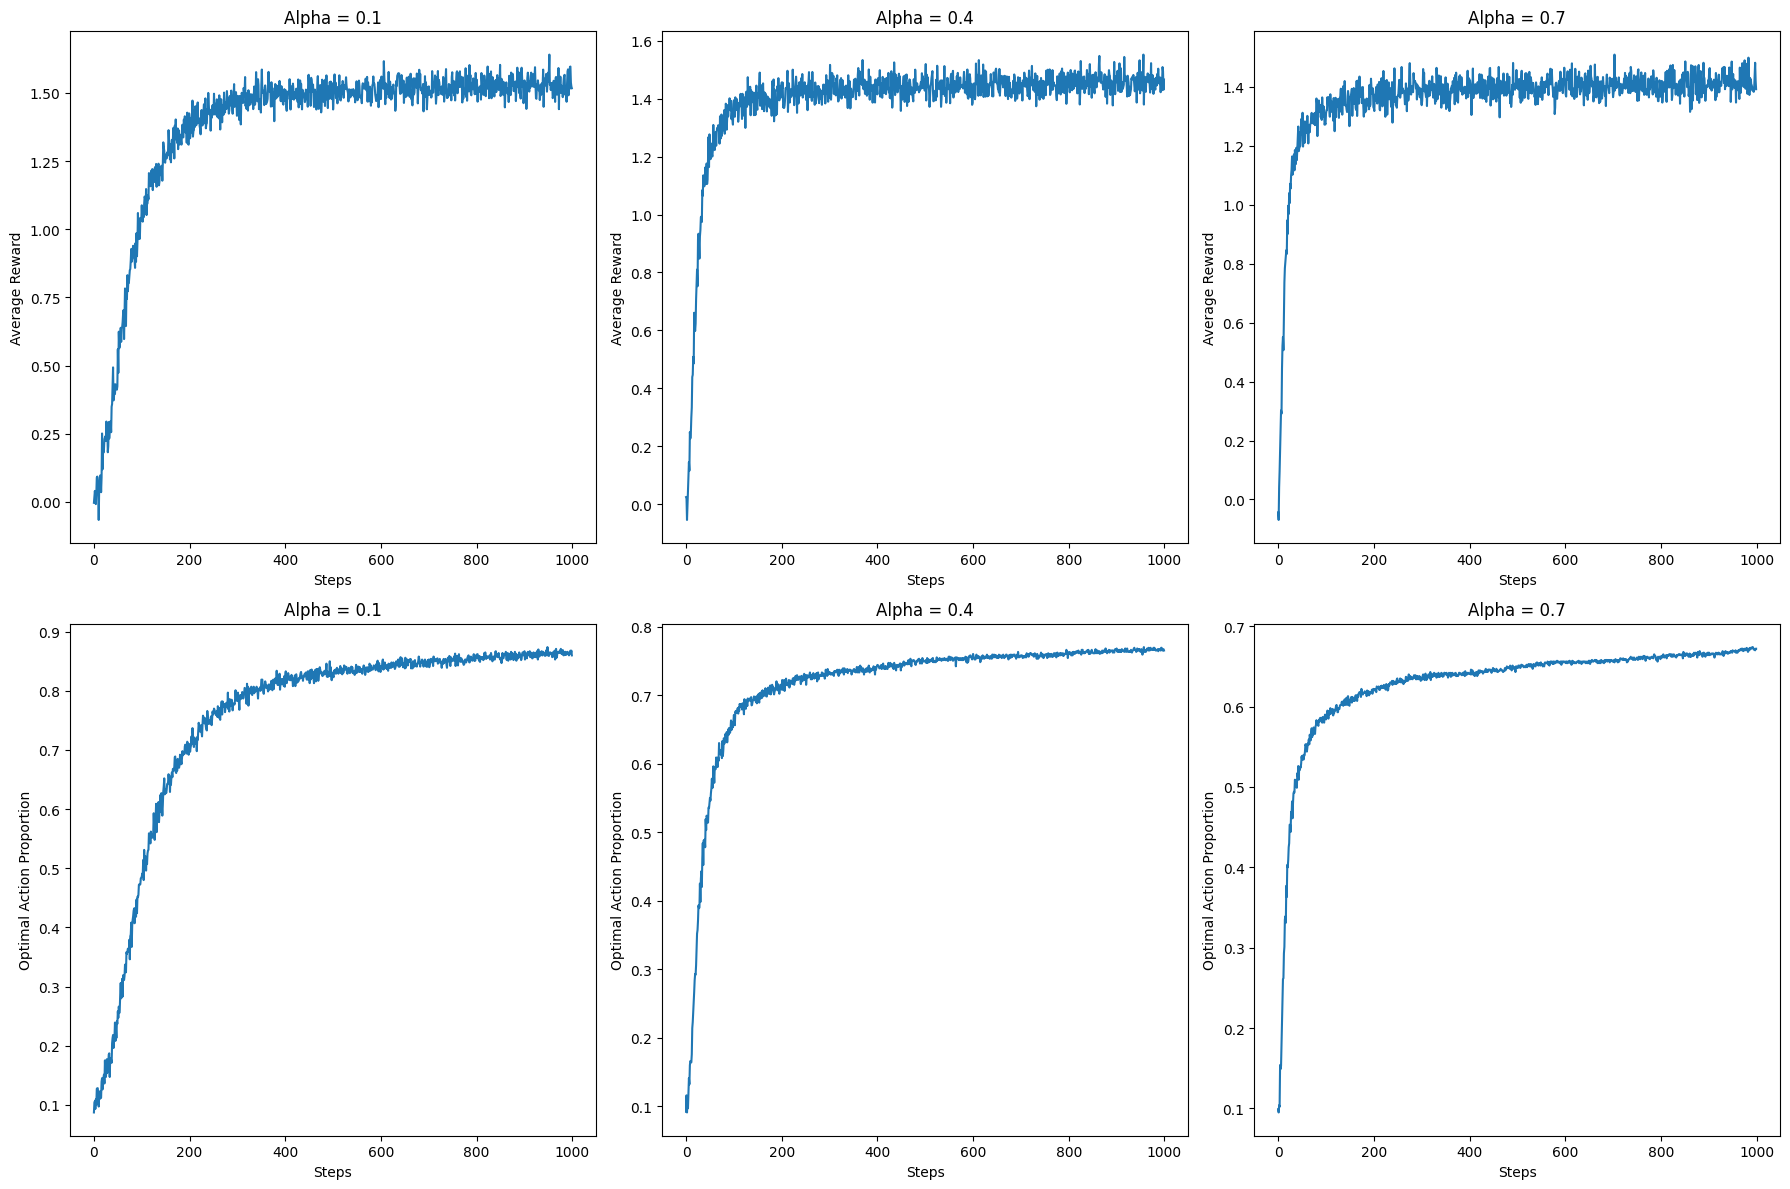

Best alpha value: 0.1


In [17]:
# Define a class for the gradient bandit algorithm
class GradientBandit:
    def __init__(self, k=10, alpha=0.1):
        # Initialize the number of arms
        self.k = k
        # Initialize the learning rate
        self.alpha = alpha
        # Initialize the true mean rewards for each arm from a normal distribution
        self.q_true = np.random.normal(0, 1, self.k)
        # Initialize the preferences for each arm to zero
        self.preferences = np.zeros(self.k)
        # Initialize the counts of times each arm has been chosen to zero
        self.action_counts = np.zeros(self.k)
        # Initialize the total reward accumulated
        self.total_reward = 0
        # Initialize the average reward to zero
        self.avg_reward = 0

    # Compute the softmax probabilities for the preferences
    def softmax(self):
        exp_preferences = np.exp(self.preferences)
        return exp_preferences / np.sum(exp_preferences)

    # Select an action based on the softmax probabilities
    def select_action(self):
        probabilities = self.softmax()
        return np.random.choice(self.k, p=probabilities)

    # Get the reward from the chosen action based on the true reward distribution
    def get_reward(self, action):
        return np.random.normal(self.q_true[action], 1)

    # Update the preferences based on the reward received
    def update_preferences(self, action, reward):
        self.action_counts[action] += 1
        self.total_reward += reward
        self.avg_reward = self.total_reward / np.sum(self.action_counts)
        probabilities = self.softmax()
        for a in range(self.k):
            if a == action:
                self.preferences[a] += self.alpha * (reward - self.avg_reward) * (1 - probabilities[a])
            else:
                self.preferences[a] -= self.alpha * (reward - self.avg_reward) * probabilities[a]

    # Run the bandit algorithm for a specified number of steps
    def run(self, steps=1000):
        rewards = np.zeros(steps)
        optimal_action_counts = np.zeros(steps)
        for step in range(steps):
            # Select the action
            action = self.select_action()
            # Get the reward for the selected action
            reward = self.get_reward(action)
            # Update the preferences for the selected action
            self.update_preferences(action, reward)
            # Store the reward for this step
            rewards[step] = reward
            # Check if the selected action was optimal
            if action == np.argmax(self.q_true):
                optimal_action_counts[step] = 1
        return rewards, optimal_action_counts

# Function to simulate the gradient bandit algorithm over multiple runs
def simulate_gradient_bandits(alpha, runs=1000, steps=1000):
    avg_rewards = np.zeros(steps)
    optimal_action_proportions = np.zeros(steps)
    for _ in range(runs):
        bandit = GradientBandit(alpha=alpha)
        rewards, optimal_actions = bandit.run(steps)
        avg_rewards += rewards
        optimal_action_proportions += optimal_actions
    avg_rewards /= runs
    optimal_action_proportions /= runs
    return avg_rewards, optimal_action_proportions

# Main block to execute the simulation and plot the results for different alpha values
if __name__ == "__main__":
    alphas = [0.1, 0.4, 0.7]
    results = {}
    plt.figure(figsize=(18, 12))

    for i, alpha in enumerate(alphas):
        # Simulate the gradient bandit algorithm for the current alpha value
        avg_rewards, optimal_action_proportions = simulate_gradient_bandits(alpha)
        results[alpha] = (avg_rewards, optimal_action_proportions)  # Store results for each alpha value
        # Plot the average reward over time for the current alpha value
        plt.subplot(2, len(alphas), i + 1)
        plt.plot(avg_rewards)
        plt.xlabel('Steps')
        plt.ylabel('Average Reward')
        plt.title(f'Alpha = {alpha}')

        # Plot the proportion of times the optimal action was chosen over time for the current alpha value
        plt.subplot(2, len(alphas), i + 1 + len(alphas))
        plt.plot(optimal_action_proportions)
        plt.xlabel('Steps')
        plt.ylabel('Optimal Action Proportion')
        plt.title(f'Alpha = {alpha}')

    plt.tight_layout()
    plt.show()

    # Analyze results to find the best alpha value
    best_alpha = None
    best_avg_reward = -np.inf
    # Iterate through the results dictionary to find the best alpha value
    for alpha, (avg_rewards, optimal_action_proportions) in results.items():
        final_avg_reward = avg_rewards[-1]
        if final_avg_reward > best_avg_reward:
            best_avg_reward = final_avg_reward
            best_alpha = alpha

    print(f"Best alpha value: {best_alpha}")


Average reward acquired and the percentage of time the optimal action is taken by the algorithm at each time step

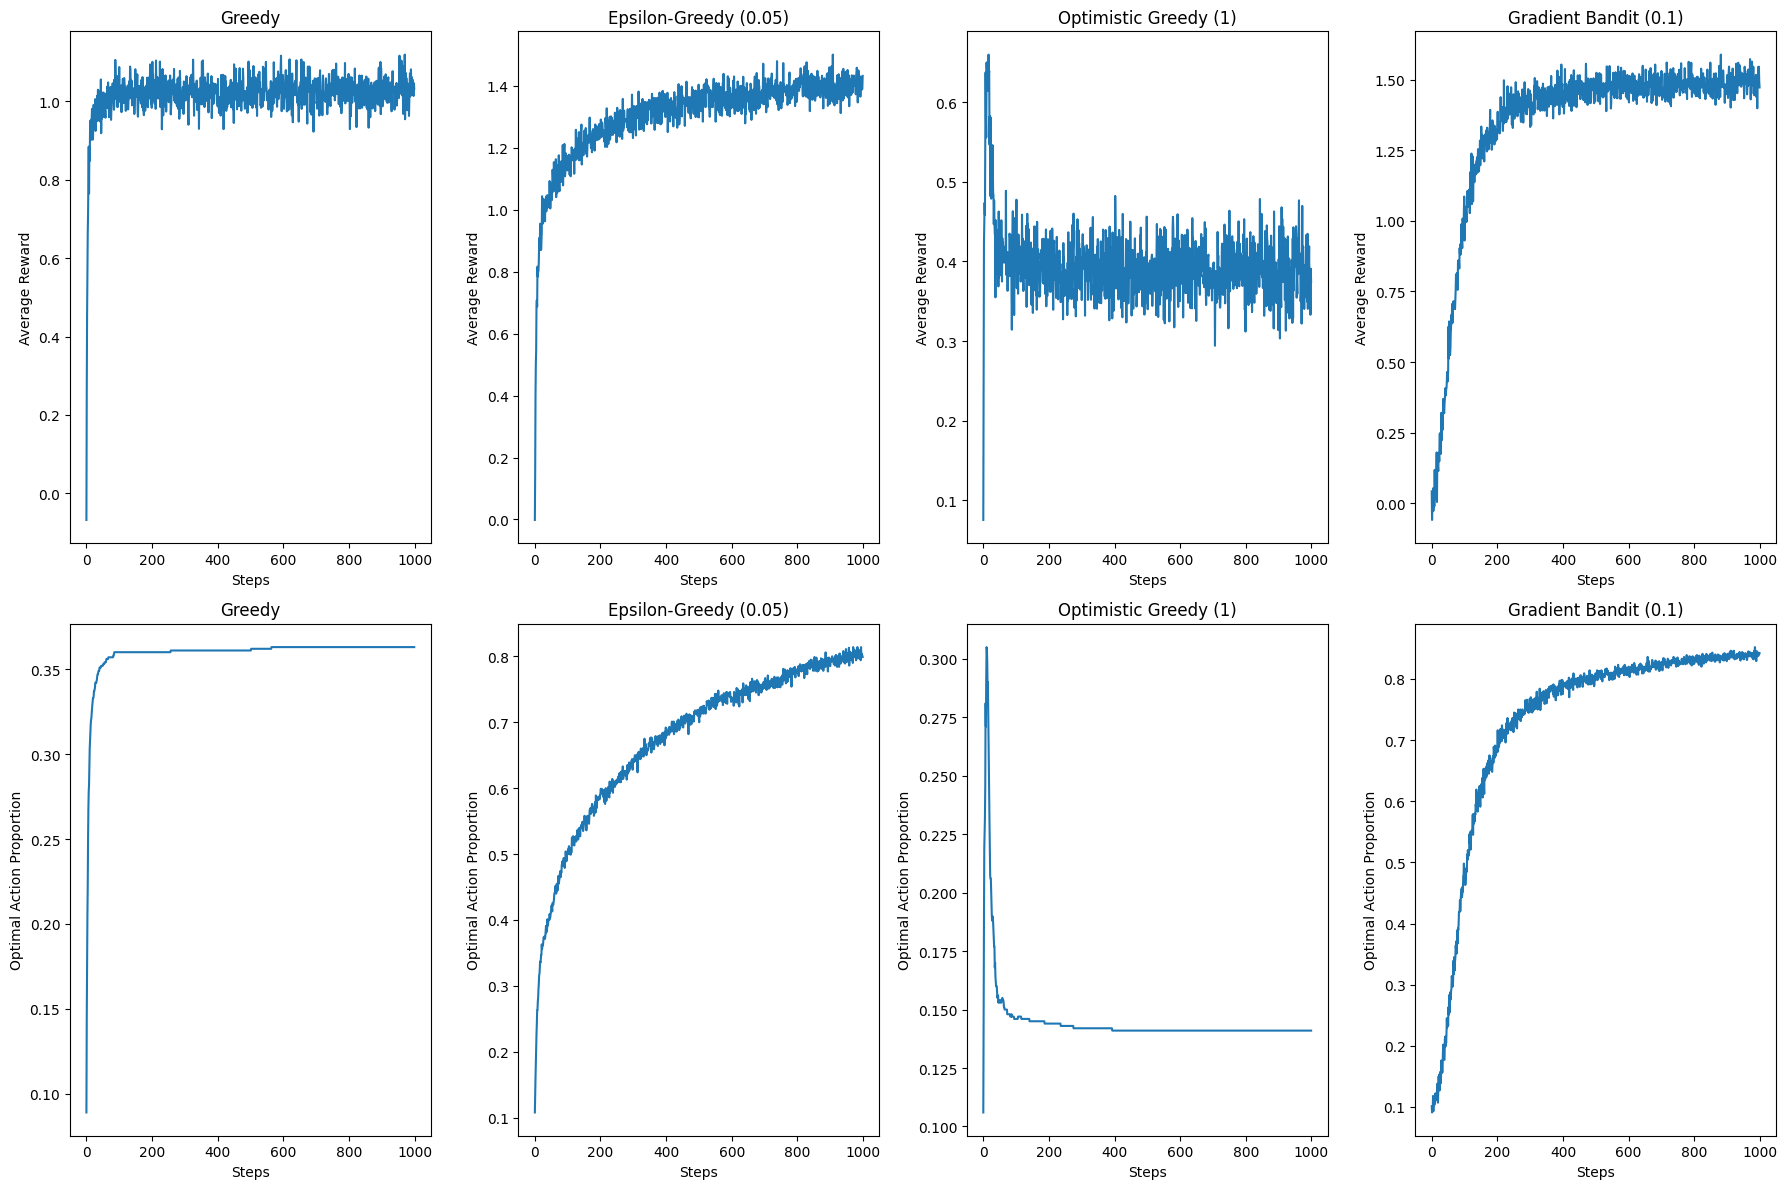

In [10]:
import numpy as np
import matplotlib.pyplot as plt

# Define the main block to execute the simulation and plot the results for different algorithms
if __name__ == "__main__":
    # Define a dictionary of algorithms with their corresponding parameters
    algorithms = {
        "Greedy": (EpsilonGreedyBandit, {"epsilon": 0}),  # Greedy algorithm
        "Epsilon-Greedy (0.05)": (EpsilonGreedyBandit, {"epsilon": 0.05}),  # Epsilon-Greedy algorithm with epsilon = 0.05
        "Optimistic Greedy (1)": (OptimisticGreedyBandit, {"initial_value": 1}),  # Optimistic Greedy algorithm with initial value = 1
        "Gradient Bandit (0.1)": (GradientBandit, {"alpha": 0.1})  # Gradient Bandit algorithm with alpha = 0.1
    }

    # Create a figure for plotting the results
    plt.figure(figsize=(18, 12))

    # Iterate through the algorithms dictionary
    for i, (name, (algorithm, kwargs)) in enumerate(algorithms.items()):
        # Simulate the bandit algorithm for the current algorithm and parameters
        avg_rewards, optimal_action_proportions = simulate_bandits(algorithm, **kwargs)

        # Plot the average reward over time for the current algorithm
        plt.subplot(2, len(algorithms), i + 1)
        plt.plot(avg_rewards)
        plt.xlabel('Steps')
        plt.ylabel('Average Reward')
        plt.title(name)

        # Plot the proportion of times the optimal action was chosen over time for the current algorithm
        plt.subplot(2, len(algorithms), i + 1 + len(algorithms))
        plt.plot(optimal_action_proportions)
        plt.xlabel('Steps')
        plt.ylabel('Optimal Action Proportion')
        plt.title(name)

    # Adjust the layout of the plots to prevent overlap
    plt.tight_layout()
    # Show the plots
    plt.show()


# PART 2


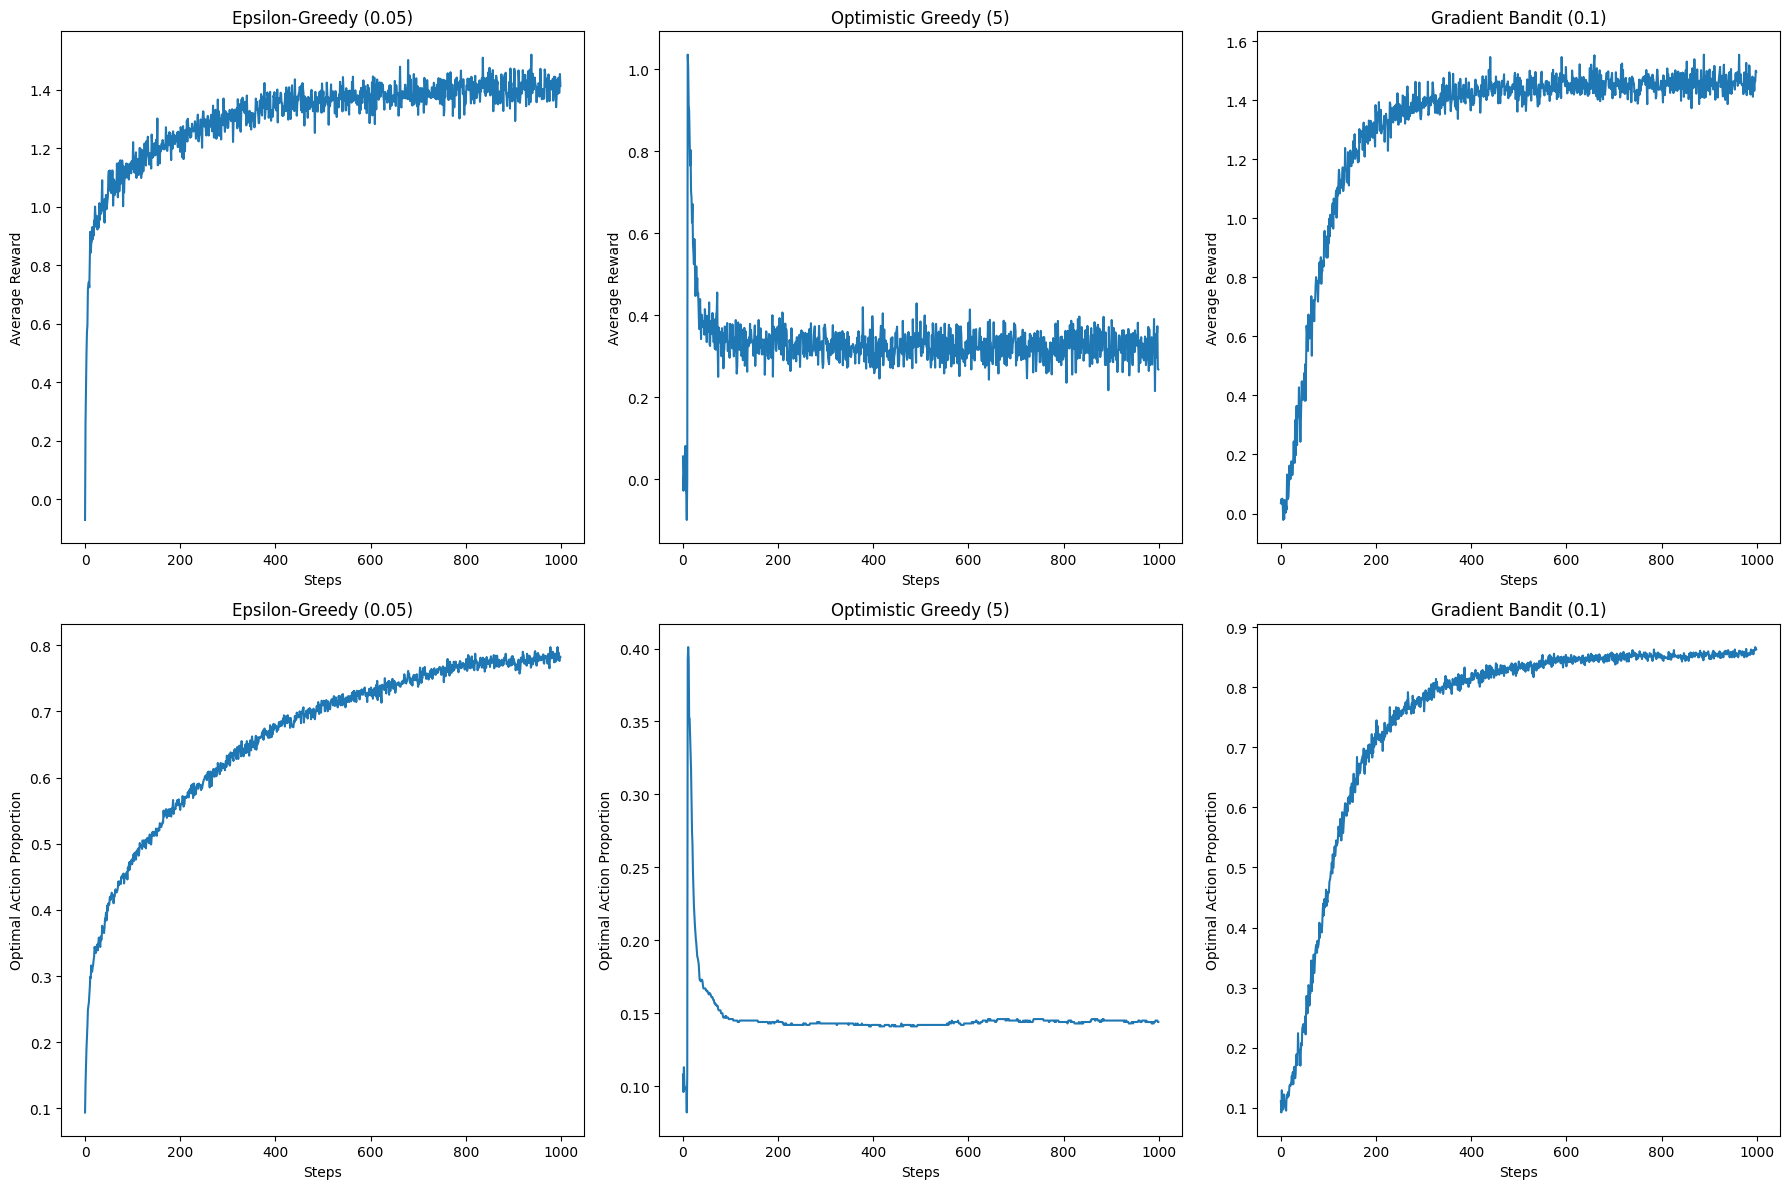

In [18]:
# Base class for non-stationary bandit problems
class NonStationaryBandit:
    def __init__(self, k=10, drift=0.001, mean_reverting=False, abrupt=False, abrupt_prob=0.005):
        self.k = k
        self.q_true = np.random.normal(0, 1, self.k)  # True action values
        self.q_estimates = np.zeros(self.k)  # Estimated action values
        self.action_counts = np.zeros(self.k)  # Action counts
        self.total_reward = 0
        self.drift = drift
        self.mean_reverting = mean_reverting
        self.abrupt = abrupt
        self.abrupt_prob = abrupt_prob

    # Update the true action values to simulate non-stationarity
    def update_means(self):
        if self.mean_reverting:
            # Mean-reverting change
            self.q_true = 0.5 * self.q_true + np.random.normal(0, 0.01, self.k)
        else:
            # Drift change
            self.q_true += np.random.normal(0, self.drift, self.k)
        if self.abrupt and np.random.rand() < self.abrupt_prob:
            # Abrupt change
            np.random.shuffle(self.q_true)

    # Get reward from the selected action
    def get_reward(self, action):
        return np.random.normal(self.q_true[action], 1)

# Epsilon-Greedy algorithm with non-stationary bandit
class NonStationaryEpsilonGreedyBandit(NonStationaryBandit):
    def __init__(self, k=10, epsilon=0.1, **kwargs):
        super().__init__(k, **kwargs)
        self.epsilon = epsilon

    # Select action using epsilon-greedy strategy
    def select_action(self):
        if np.random.rand() < self.epsilon:
            return np.random.choice(self.k)
        else:
            return np.argmax(self.q_estimates)

    # Update action value estimates
    def update_estimates(self, action, reward):
        self.action_counts[action] += 1
        self.q_estimates[action] += (reward - self.q_estimates[action]) / self.action_counts[action]

    # Run the simulation
    def run(self, steps=1000):
        rewards = np.zeros(steps)
        optimal_action_counts = np.zeros(steps)
        for step in range(steps):
            self.update_means()  # Non-stationary update
            action = self.select_action()
            reward = self.get_reward(action)
            self.update_estimates(action, reward)
            rewards[step] = reward
            if action == np.argmax(self.q_true):
                optimal_action_counts[step] = 1
        return rewards, optimal_action_counts

# Optimistic Greedy algorithm with non-stationary bandit
class NonStationaryOptimisticGreedyBandit(NonStationaryBandit):
    def __init__(self, k=10, initial_value=5, **kwargs):
        super().__init__(k, **kwargs)
        self.q_estimates = np.full(self.k, initial_value)

    # Select action greedily
    def select_action(self):
        return np.argmax(self.q_estimates)

    # Update action value estimates
    def update_estimates(self, action, reward):
        self.action_counts[action] += 1
        self.q_estimates[action] += (reward - self.q_estimates[action]) / self.action_counts[action]

    # Run the simulation
    def run(self, steps=1000):
        rewards = np.zeros(steps)
        optimal_action_counts = np.zeros(steps)
        for step in range(steps):
            self.update_means()  # Non-stationary update
            action = self.select_action()
            reward = self.get_reward(action)
            self.update_estimates(action, reward)
            rewards[step] = reward
            if action == np.argmax(self.q_true):
                optimal_action_counts[step] = 1
        return rewards, optimal_action_counts

# Gradient Bandit algorithm with non-stationary bandit
class NonStationaryGradientBandit(NonStationaryBandit):
    def __init__(self, k=10, alpha=0.1, **kwargs):
        super().__init__(k, **kwargs)
        self.alpha = alpha
        self.preferences = np.zeros(self.k)
        self.total_reward = 0
        self.avg_reward = 0

    # Compute softmax probabilities
    def softmax(self):
        exp_preferences = np.exp(self.preferences)
        return exp_preferences / np.sum(exp_preferences)

    # Select action using softmax probabilities
    def select_action(self):
        probabilities = self.softmax()
        return np.random.choice(self.k, p=probabilities)

    # Update preferences based on reward
    def update_preferences(self, action, reward):
        self.action_counts[action] += 1
        self.total_reward += reward
        self.avg_reward = self.total_reward / np.sum(self.action_counts)
        probabilities = self.softmax()
        for a in range(self.k):
            if a == action:
                self.preferences[a] += self.alpha * (reward - self.avg_reward) * (1 - probabilities[a])
            else:
                self.preferences[a] -= self.alpha * (reward - self.avg_reward) * probabilities[a]

    # Run the simulation
    def run(self, steps=1000):
        rewards = np.zeros(steps)
        optimal_action_counts = np.zeros(steps)
        for step in range(steps):
            self.update_means()  # Non-stationary update
            action = self.select_action()
            reward = self.get_reward(action)
            self.update_preferences(action, reward)
            rewards[step] = reward
            if action == np.argmax(self.q_true):
                optimal_action_counts[step] = 1
        return rewards, optimal_action_counts

# Function to simulate the non-stationary bandit algorithms
def simulate_non_stationary_bandits(algorithm, runs=1000, steps=1000, **kwargs):
    avg_rewards = np.zeros(steps)
    optimal_action_proportions = np.zeros(steps)
    for _ in range(runs):
        bandit = algorithm(**kwargs)
        rewards, optimal_actions = bandit.run(steps)
        avg_rewards += rewards
        optimal_action_proportions += optimal_actions
    avg_rewards /= runs
    optimal_action_proportions /= runs
    return avg_rewards, optimal_action_proportions

# Main function to compare algorithms
if __name__ == "__main__":
    algorithms = {
        "Epsilon-Greedy (0.05)": (NonStationaryEpsilonGreedyBandit, {"epsilon": 0.05}),
        "Optimistic Greedy (5)": (NonStationaryOptimisticGreedyBandit, {"initial_value": 5}),
        "Gradient Bandit (0.1)": (NonStationaryGradientBandit, {"alpha": 0.1})
    }

    plt.figure(figsize=(18, 12))

    for i, (name, (algorithm, kwargs)) in enumerate(algorithms.items()):
        avg_rewards, optimal_action_proportions = simulate_non_stationary_bandits(algorithm, **kwargs)
        plt.subplot(2, len(algorithms), i + 1)
        plt.plot(avg_rewards)
        plt.xlabel('Steps')
        plt.ylabel('Average Reward')
        plt.title(name)

        plt.subplot(2, len(algorithms), i + 1 + len(algorithms))
        plt.plot(optimal_action_proportions)
        plt.xlabel('Steps')
        plt.ylabel('Optimal Action Proportion')
        plt.title(name)

    plt.tight_layout()
    plt.show()


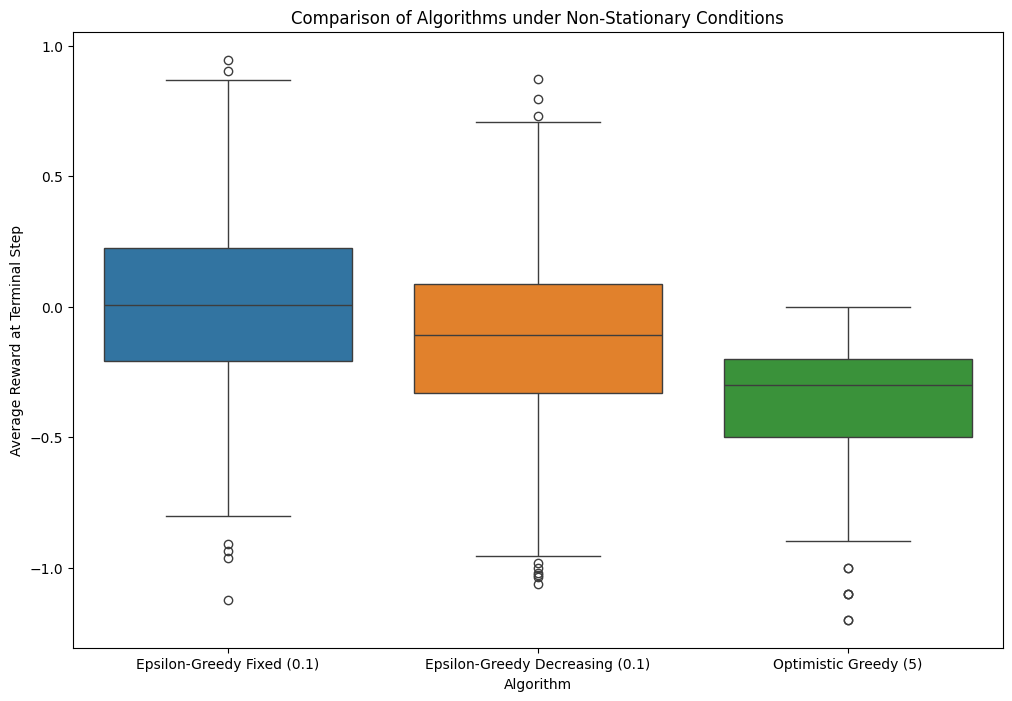

In [12]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Base class for non-stationary bandit problems
class NonStationaryBandit:
    def __init__(self, k=10, drift=0.001, mean_reverting=False, abrupt=False, abrupt_prob=0.005):
        self.k = k
        self.q_true = np.random.normal(0, 1, self.k)  # True action values
        self.q_estimates = np.zeros(self.k)  # Estimated action values
        self.action_counts = np.zeros(self.k)  # Action counts
        self.total_reward = 0
        self.drift = drift
        self.mean_reverting = mean_reverting
        self.abrupt = abrupt
        self.abrupt_prob = abrupt_prob

    # Update the true action values to simulate non-stationarity
    def update_means(self):
        if self.mean_reverting:
            # Mean-reverting change
            self.q_true = 0.5 * self.q_true + np.random.normal(0, 0.01, self.k)
        else:
            # Drift change
            self.q_true += np.random.normal(0, self.drift, self.k)
        if self.abrupt and np.random.rand() < self.abrupt_prob:
            # Abrupt change
            np.random.shuffle(self.q_true)

    # Get reward from the selected action
    def get_reward(self, action):
        return np.random.normal(self.q_true[action], 1)

# Epsilon-Greedy algorithm with non-stationary bandit and fixed step size
class NonStationaryEpsilonGreedyFixed(NonStationaryBandit):
    def __init__(self, k=10, epsilon=0.1, **kwargs):
        super().__init__(k, **kwargs)
        self.epsilon = epsilon

    # Select action using epsilon-greedy strategy
    def select_action(self):
        if np.random.rand() < self.epsilon:
            return np.random.choice(self.k)
        else:
            return np.argmax(self.q_estimates)

    # Update action value estimates
    def update_estimates(self, action, reward):
        self.action_counts[action] += 1
        self.q_estimates[action] += (reward - self.q_estimates[action]) / self.action_counts[action]

    # Run the simulation
    def run(self, steps=20000):
        for step in range(steps):
            self.update_means()  # Non-stationary update
            action = self.select_action()
            reward = self.get_reward(action)
            self.update_estimates(action, reward)
        return np.mean(self.q_estimates)

# Epsilon-Greedy algorithm with non-stationary bandit and decreasing step size
class NonStationaryEpsilonGreedyDecreasing(NonStationaryBandit):
    def __init__(self, k=10, epsilon=0.1, **kwargs):
        super().__init__(k, **kwargs)
        self.epsilon = epsilon

    # Select action using epsilon-greedy strategy
    def select_action(self):
        if np.random.rand() < self.epsilon:
            return np.random.choice(self.k)
        else:
            return np.argmax(self.q_estimates)

    # Update action value estimates with decreasing step size
    def update_estimates(self, action, reward):
        self.action_counts[action] += 1
        self.q_estimates[action] += (reward - self.q_estimates[action]) / self.action_counts[action]

    # Run the simulation
    def run(self, steps=20000):
        for step in range(steps):
            self.epsilon = 1 / (step + 1)  # Decreasing epsilon
            self.update_means()  # Non-stationary update
            action = self.select_action()
            reward = self.get_reward(action)
            self.update_estimates(action, reward)
        return np.mean(self.q_estimates)

# Optimistic Greedy algorithm with non-stationary bandit
class NonStationaryOptimisticGreedy(NonStationaryBandit):
    def __init__(self, k=10, initial_value=5, **kwargs):
        super().__init__(k, **kwargs)
        self.q_estimates = np.full(self.k, initial_value)

    # Select action greedily
    def select_action(self):
        return np.argmax(self.q_estimates)

    # Update action value estimates
    def update_estimates(self, action, reward):
        self.action_counts[action] += 1
        self.q_estimates[action] += (reward - self.q_estimates[action]) / self.action_counts[action]

    # Run the simulation
    def run(self, steps=20000):
        for step in range(steps):
            self.update_means()  # Non-stationary update
            action = self.select_action()
            reward = self.get_reward(action)
            self.update_estimates(action, reward)
        return np.mean(self.q_estimates)

# Function to simulate the non-stationary bandit algorithms and plot results
def simulate_non_stationary_bandits(algorithm, runs=1000, steps=20000, **kwargs):
    terminal_rewards = []
    for _ in range(runs):
        bandit = algorithm(**kwargs)
        terminal_reward = bandit.run(steps)
        terminal_rewards.append(terminal_reward)
    return terminal_rewards

if __name__ == "__main__":
    # Algorithms to be tested
    algorithms = {
        "Epsilon-Greedy Fixed (0.1)": (NonStationaryEpsilonGreedyFixed, {"epsilon": 0.1}),
        "Epsilon-Greedy Decreasing (0.1)": (NonStationaryEpsilonGreedyDecreasing, {"epsilon": 0.1}),
        "Optimistic Greedy (5)": (NonStationaryOptimisticGreedy, {"initial_value": 5})
    }

    # Simulate each algorithm
    results = {}
    for name, (algorithm, kwargs) in algorithms.items():
        results[name] = simulate_non_stationary_bandits(algorithm, **kwargs)

    # Plot the results using box plots
    plt.figure(figsize=(12, 8))
    sns.boxplot(data=list(results.values()), orient="v")
    plt.xticks(range(len(results)), list(results.keys()))
    plt.xlabel('Algorithm')
    plt.ylabel('Average Reward at Terminal Step')
    plt.title('Comparison of Algorithms under Non-Stationary Conditions')
    plt.show()
